In [1]:
import pandas as pd    
import numpy as np
import scipy.stats as stats
import scipy
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams.update({'font.size': 20})

In [3]:
import urllib.request as request

**Imports all traffic data from 2007 - 2018**

Link: https://data.seattle.gov/browse?q=traffic%20flow%20count&sortBy=relevance to download yearly data

In [4]:
url_list = ['https://data-seattlecitygis.opendata.arcgis.com/datasets/7015d5d46a284f94ac05c2ea4358bcd7_0.csv',
            'https://data-seattlecitygis.opendata.arcgis.com/datasets/5fc63b2a48474100b560a7d98b5097d7_1.csv',
            'https://data-seattlecitygis.opendata.arcgis.com/datasets/27af9a2485c5442bb061fa7e881d7022_2.csv',
            'https://data-seattlecitygis.opendata.arcgis.com/datasets/4f62515558174f53979b3be0335004d3_3.csv',
            'https://data-seattlecitygis.opendata.arcgis.com/datasets/29f801d03c9b4b608bca6a8e497278c3_4.csv',
            'https://data-seattlecitygis.opendata.arcgis.com/datasets/a0019dd0d6464747a88921f5e103d509_5.csv',
            'https://data-seattlecitygis.opendata.arcgis.com/datasets/40bcfbc4054549ebba8b5777bbdd40ff_6.csv',
            'https://data-seattlecitygis.opendata.arcgis.com/datasets/16cedd233d914118a275c6510115d466_7.csv',
            'https://data-seattlecitygis.opendata.arcgis.com/datasets/902fd604ecf54adf8579894508cacc68_8.csv',
            'https://data-seattlecitygis.opendata.arcgis.com/datasets/170b764c52f34c9497720c0463f3b58b_9.csv',
            'https://data-seattlecitygis.opendata.arcgis.com/datasets/2c37babc94d64bbb938a9b520bc5538c_10.csv',
            'https://data-seattlecitygis.opendata.arcgis.com/datasets/a35aa9249110472ba2c69cc574eff984_11.csv']
    

In [5]:
def get_df(year):
    '''Enter the desired year to download the traffic flow count
    data for that year. Example: enter '7' for the year 2007.
    '''
    num = year-7
    df_year = pd.read_csv(url_list[num])
    if year == 15 or year == 16:
        df_year = df_year.rename(columns={"COUNTAAWDT" : 'AAWDT', "FLOWSEGID" : "GEOBASID", 'FIRST_STNAME_ORD' : 'STNAME'})
    elif year == 17 or year == 18:
        df_year = df_year.rename(columns={"AWDT" : 'AAWDT', "FLOWSEGID" : "GEOBASID", 'STNAME_ORD' : 'STNAME'})
        
    df_year_AAWDT = df_year['AAWDT'].values
    df_year_geobase = df_year['GEOBASID'].values
    df_year_dist = df_year['SHAPE_Length'].values
    
    return df_year #, df_year_AAWDT, df_year_geobase, df_year_dist

In [6]:
# Creates a dictionary of dataframes and a list of years
dfs = {}
years = np.arange(7,19,1)

for year in years:
    dfs[year] = get_df(year)

In [7]:
# Creates a dictionary of dataframes of traffic data
traffic = {}
all_columns = ['OBJECTID', 'GEOBASID', 'STNAME', 'COMPKEY', 'NAME', 'SHAPE_Length', 'AAWDT']

for year in [17]:
    columns = []
    for col in all_columns:
        if col in dfs[year].columns:
            columns.append(col)
    #print(dfs[year].columns)
    print(columns)
    traffic[year] = dfs[year][columns]

['OBJECTID', 'GEOBASID', 'STNAME', 'COMPKEY', 'SHAPE_Length', 'AAWDT']


In [8]:
traffic[17].head()

,OBJECTID,GEOBASID,STNAME,COMPKEY,SHAPE_Length,AAWDT
0,1924,375,15TH AVE S,"2153,2151,2152",898.373909,10835
1,1925,1525,FREMONT AVE N,"10499,10502,10501,10500",1059.740443,4170
2,1926,1861,N 115TH ST,"15076,15075",2648.272605,9513
3,1927,1219,"W GALER ST,MAGNOLIA BLVD W","23358,11606,11607",2097.673439,9620
4,1928,1173,19TH AVE E,"2657,2659,2660,2658,2656",2321.878141,6736


,OBJECTID,GEOBASID,STNAME,COMPKEY,SHAPE_Length,AAWDT
0,1924,375,15TH AVE S,"2153,2151,2152",898.373909,10835
1,1925,1525,FREMONT AVE N,"10499,10502,10501,10500",1059.740443,4170
2,1926,1861,N 115TH ST,"15076,15075",2648.272605,9513
3,1927,1219,"W GALER ST,MAGNOLIA BLVD W","23358,11606,11607",2097.673439,9620
4,1928,1173,19TH AVE E,"2657,2659,2660,2658,2656",2321.878141,6736


In [15]:
# Creates dataframe of bike lane data
df_bike = pd.read_csv('Data/Street_Network_Database_(SND).csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Street_Network_Database_(SND).csv'

In [170]:
bike_filter = df_bike['SEGMENT_TYPE'] == 6
#bike = df_bike[['OBJECTID', 'STNAME_ID', 'COMPKEY']][bike_filter]
#bike[bike['COMPKEY']==15553]
df_bike.head()

,OBJECTID,F_INTR_ID,T_INTR_ID,SND_ID,SND_FEACODE,CITYCODE,STNAME_ID,ST_CODE,ARTERIAL_CODE,SEGMENT_TYPE,...,L_ZIP,R_CITY,R_STATE,R_ZIP,SNDSEG_UPDATE,COMPKEY,COMPTYPE,UNITID,UNITID2,SHAPE_Length
0,1,17740,17791,33478,5,1,566,0,1,1,...,98108,SEATTLE,WA,98108,2007/04/22 00:00:00+00,8460,68,4805.0,820.0,291.426335
1,2,11391,11295,20097,1,1,659,0,0,1,...,98102,SEATTLE,WA,98102,2007/04/22 00:00:00+00,9236,68,5465.0,10.0,431.467882
2,3,982,979,42208,1,0,1797,40,0,1,...,98155,LAKE FOREST PARK,WA,98155,2004/05/19 00:00:00+00,0,0,0.0,0.0,162.446146
3,4,11695,11696,20460,77,1,1444,20,0,6,...,98122,SEATTLE,WA,98122,2004/05/19 00:00:00+00,0,0,0.0,0.0,79.522621
4,5,6257,6252,9237,1,1,2086,0,0,1,...,98107,SEATTLE,WA,98107,2012/10/12 00:00:00+00,18575,68,14630.0,200.0,643.835648


In [167]:
year = 10
traffic[year][traffic[year]['STNAME']=='N 45TH ST']

,OBJECTID,GEOBASID,COMPKEY,STNAME,NAME,AAWDT
157,158,121250320,15553,N 45TH ST,"N 45TH ST, W/O EASTERN AVE N",21700


15 has no traffic data for MONTLAKE BR
16 has no traffic data for MONTLAKE BR
17 has no traffic data for MONTLAKE BR
18 has no traffic data for MONTLAKE BR


Text(0, 0.5, 'Traffic flow (vehicles/weekday)')

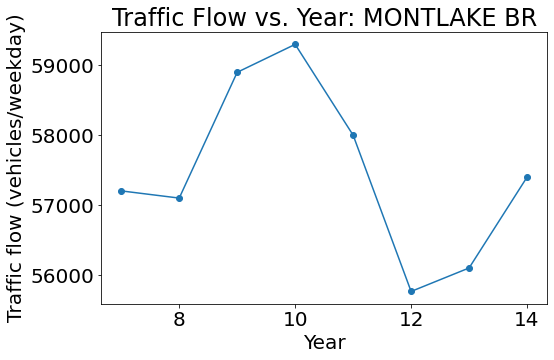

In [114]:
# Creates a dictionary of traffic flow on a given street
dic = {}
street = 'MONTLAKE BR'

for year in years:
    dic[year] = dfs[year].loc[dfs[year]['STNAME']==street]
    if dic[year]['AAWDT'].empty:
        dic.pop(year)
        print(year, 'has no traffic data for', street)
    else:
        dic[year] = dic[year]['AAWDT'].values[0]
        
# Plots data
fig, ax = plt.subplots(figsize=(8,5))

x = dic.keys()
y = dic.values()
ax.plot(x, y, marker='o', linestyle='-')

ax.set_title(f'Traffic Flow vs. Year: {street}')
ax.set_xlabel('Year')
ax.set_ylabel('Traffic flow (vehicles/weekday)')

In [97]:
# Finding streets
street = 'AURORA AVE N'
year = 18
df = dfs[year].loc[dfs[year]['STNAME'].str.contains(street, na=False)]
mask = df['COMPKEY']=="8933,8932,8935,8936,8931,8930,8937,8934"
df = df[mask]
df = df.sort_values(by='AAWDT', ascending=False)
df

,OBJECTID,COMPKEY,STNAME,GEOBASID,DOWNTOWN,START_DATE,AMPK,PMPK,AAWDT,ADT,AWDT_ROUNDED,DATAQUALITY,FLAGS,SHAPE_Length
845,853,"8933,8932,8935,8936,8931,8930,8937,8934",AURORA AVE N,1977,N,1970/01/01 00:00:00+00,NaN,NaN,54000.0,NaN,54000,Estimate,NaN,4330.002837


In [29]:
#new = dfs[year].groupby(['GEOBASID']).count()
#new

In [33]:
street = 'MONTLAKE BR'
dfs[year].loc[dfs[year]['STNAME']==street]

,OBJECTID,GEOBASID,DOWNTOWN,COMPKEY,STNAME,OID_,NAME,YEAR,SEGKEY,AAWDT,INPUT_STUD,HPMS,FLOW_COUNT,SHAPE_Length
198,199,86850010,N,11902,MONTLAKE BR,182,"MONTLAKE BR, S/O POINT A",2010,11902,59300,302067,,Y,1362.081215


# Other stuff

In [33]:
montlake_br_traffic_07 = df_07.loc[df_07['STNAME']=='MONTLAKE BR']

In [19]:
montlake_br_traffic_07

,OBJECTID,GEOBASID,DOWNTOWN,COMPKEY,STNAME,OID_,NAME,YEAR,SEGKEY,AAWDT,INPUT_STUD,HPMS,FLOW_COUNT,SHAPE_Length
197,198,86850010,N,11902,MONTLAKE BR,83,"MONTLAKE BR, S/O POINT A",2007,11902,57203,0,,Y,1362.081215


In [49]:
df_048 = get_df(8)

In [294]:
def get_montlake_br_data(year):
    '''Enter the desired year to download the traffic flow count
    data for that year. Example: enter '7' for the year 2007.
    '''
    df_year = get_df(year)
    montlake_br_traffic_year = df_year.loc[df_year['STNAME'] == 'MONTLAKE BLVD NE']
    return montlake_br_traffic_year

In [295]:
montlake_br_data_08 = get_montlake_br_data(8)

In [296]:
montlake_br_data_08

,OBJECTID,GEOBASID,DOWNTOWN,COMPKEY,STNAME,OID_,NAME,YEAR,SEGKEY,AAWDT,INPUT_STUD,HPMS,FLOW_COUNT,SHAPE_Length
149,150,86950030,N,11911,MONTLAKE BLVD NE,164,"MONTLAKE BLVD NE, N/O NE PACIFIC PL",2008,11911,46100,0,,Y,3751.859475


In [297]:
montlake_br_data_by_year = pd.DataFrame()
year_list = range(7,19)
for year in year_list:
    num = year-7
    print(year)
    new = get_montlake_br_data(year)
    montlake_br_data_by_year = montlake_br_data_by_year.append(new)

7
8
9
10
11
12
13
14
15
16
17
18


In [299]:
montlake_br_data_by_year.head()

,OBJECTID,GEOBASID,DOWNTOWN,COMPKEY,STNAME,OID_,NAME,YEAR,SEGKEY,AAWDT,...,COUNTAADT,ESTIMATE,AWDT_ROUND,START_DATE,AMPK,PMPK,ADT,AWDT_ROUNDED,DATAQUALITY,FLAGS
148,149,86950030.0,N,11911.0,MONTLAKE BLVD NE,188.0,"MONTLAKE BLVD NE, N/O NE PACIFIC PL",2007.0,11911.0,46000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,150,86950030.0,N,11911.0,MONTLAKE BLVD NE,164.0,"MONTLAKE BLVD NE, N/O NE PACIFIC PL",2008.0,11911.0,46100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,150,86950030.0,N,11911.0,MONTLAKE BLVD NE,152.0,"MONTLAKE BLVD NE, N/O NE PACIFIC PL",2009.0,11911.0,47800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,150,86950030.0,N,11911.0,MONTLAKE BLVD NE,152.0,"MONTLAKE BLVD NE, N/O NE PACIFIC PL",2010.0,11911.0,45900.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,127,86950030.0,N,11911.0,MONTLAKE BLVD NE,NaN,"MONTLAKE BLVD NE, N/O NE PACIFIC PL",NaN,11911.0,46800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
